In [1]:
## genenrate bounding box using google genai

In [1]:
from mb_annotation.bounding_box import google_model,generate_bounding_box,add_bounding_box
from mb_annotation.utils import load_env_file

/home/malav/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
load_env_file('./env');

In [3]:
model = google_model(model="gemini-1.5-pro-latest",api_key=os.environ.get("GOOGLE_API_KEY"))

In [4]:
res =generate_bounding_box(model,image_path="/home/malav/Downloads/boilled_eggs.jpeg",prompt='Return bounding boxes of container, for each only one return [xmin,ymin, xmax, ymax]')

In [5]:
import json
if type(res) != dict:
    try:
        res = json.loads(res.text)
    except:
        res = eval(res.text)
print(res)

{'container': [201, 12, 894, 983]}


In [6]:
img_bb,value = add_bounding_box(image_path="/home/malav/Downloads/boilled_eggs.jpeg",bounding_box=res,label="container",box_resize=True,show=False)

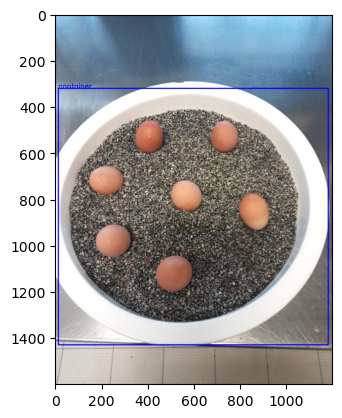

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img_bb)
plt.show()

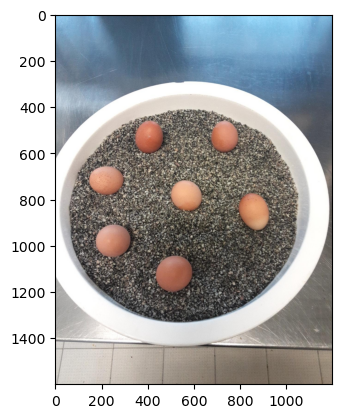

In [11]:
## generate mask using segment anything 2
import cv2
img = cv2.imread("/home/malav/Downloads/boilled_eggs.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [12]:
from mb_annotation.sam2 import get_mask_generator,show_anns

/home/malav/.local/lib/python3.11/site-packages/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


In [13]:
gen_mask = get_mask_generator(model_cfg='./sam2_hiera_s.yaml',sam2_checkpoint='/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt')

In [14]:
masks = gen_mask.generate(img)


In [15]:
masks

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 16320,
  'bbox': [793.0, 775.0, 131.0, 160.0],
  'predicted_iou': 0.9910995364189148,
  'point_coords': [[918.75, 875.0]],
  'stability_score': 0.9839659929275513,
  'crop_box': [0.0, 0.0, 1200.0, 1600.0]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 19619,
  'bbo

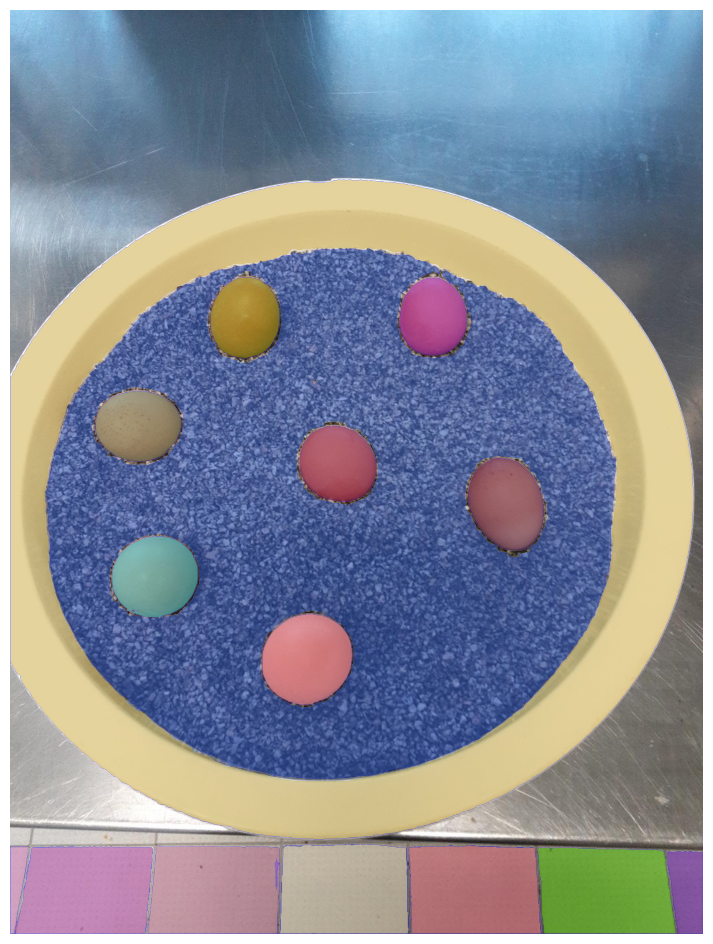

In [16]:
plt.figure(figsize=(12,12))
plt.imshow(img)
show_anns(masks)
plt.axis('off')
plt.show() 

In [28]:
final_bbox = []
for i in masks:
    value2 = [i['bbox'][1],i['bbox'][0],i['bbox'][1]+i['bbox'][3],i['bbox'][0]+i['bbox'][2]]
    final_bbox.append(value2)
final_bbox


[[775.0, 793.0, 935.0, 924.0],
 [1045.0, 436.0, 1203.0, 593.0],
 [911.0, 176.0, 1052.0, 325.0],
 [413.0, 62.0, 1331.0, 1048.0],
 [719.0, 501.0, 851.0, 634.0],
 [462.0, 346.0, 603.0, 466.0],
 [463.0, 674.0, 598.0, 791.0],
 [461.0, 346.0, 603.0, 780.0],
 [659.0, 147.0, 782.0, 296.0],
 [659.0, 147.0, 1041.0, 296.0],
 [293.0, 0.0, 1436.0, 1183.0],
 [1450.0, 913.0, 1599.0, 1174.0],
 [1446.0, 689.0, 1599.0, 1136.0],
 [1446.0, 690.0, 1599.0, 919.0],
 [1443.0, 250.0, 1599.0, 690.0],
 [1444.0, 466.0, 1599.0, 690.0],
 [1456.0, 1136.0, 1599.0, 1199.0],
 [1448.0, 8.0, 1599.0, 247.0],
 [1448.0, 10.0, 1599.0, 466.0],
 [1446.0, 482.0, 1599.0, 920.0],
 [1446.0, 238.0, 1599.0, 467.0],
 [1448.0, 0.0, 1599.0, 31.0]]

In [27]:
value

[321, 14, 1430, 1179]

In [31]:
def get_similarity_value(box1,box2):
    val1 = abs(box1[0]-box2[0])
    val2 = abs(box1[1]-box2[1])
    val3 = abs(box1[2]-box2[2])
    val4 = abs(box1[3]-box2[3])
    total_val = val1+val2+val3+val4
    return total_val

def get_final_similar_box(box1,box2: list):
    best_box = None
    best_val = None
    index = None
    for i in box2:
        val = get_similarity_value(box1,i)
        if best_box is None or val < best_val:
            best_box = i
            best_val = val
            index = box2.index(i)
    return best_box,index



In [32]:
get_final_similar_box(value,final_bbox)

([293.0, 0.0, 1436.0, 1183.0], 10)

In [34]:
masks[10]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 377351,
 'bbox': [0.0, 293.0, 1183.0, 1143.0],
 'predicted_iou': 0.982673704624176,
 'point_coords': [[1106.25, 625.0]],
 'stability_score': 0.9587298631668091,
 'crop_box': [0.0, 0.0, 1200.0, 1600.0]}

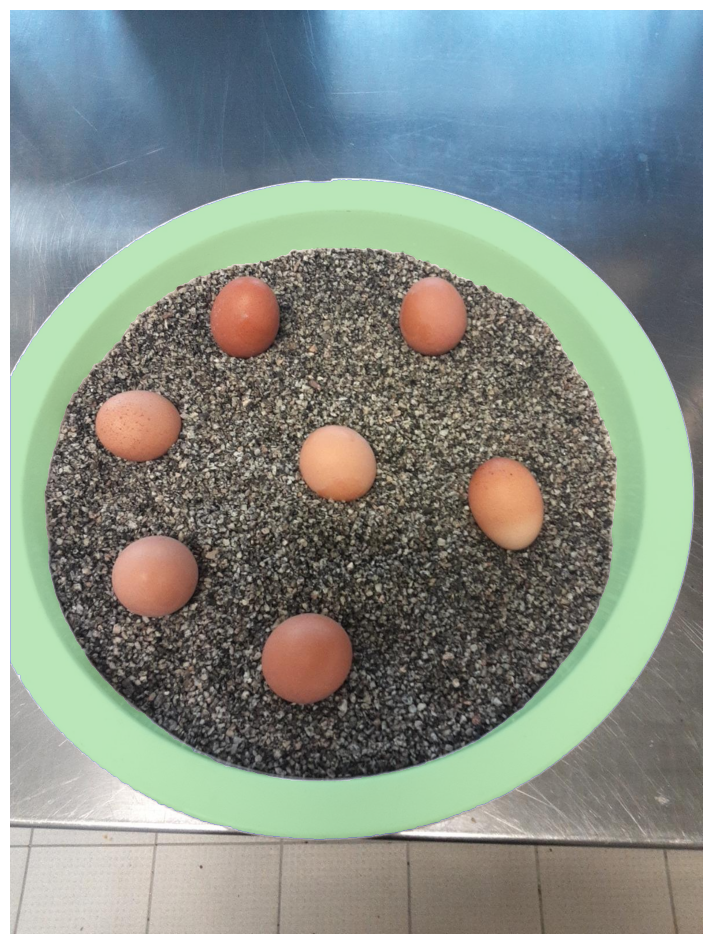

In [37]:
plt.figure(figsize=(12,12))
plt.imshow(img)
show_anns([masks[10]])
plt.axis('off')
plt.show() 